In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
from numba import njit, prange

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


## Poisson 1D: soluzione = $sin(\pi\,x)$

In [2]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

Compiling model...
'compile' took 0.001217 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [3.60e+03, 9.51e-01]    [3.71e+03, 9.51e-01]    [3.14e+00]    
1000      [4.91e+00, 4.64e-02]    [3.43e+00, 4.64e-02]    [1.30e-01]    
2000      [6.00e-01, 1.38e-01]    [3.48e-01, 1.38e-01]    [2.97e-01]    
3000      [1.72e-01, 1.12e-01]    [9.58e-02, 1.12e-01]    [2.72e-01]    
4000      [3.03e-02, 4.54e-02]    [1.51e-02, 4.54e-02]    [1.74e-01]    
5000      [3.33e-03, 6.87e-03]    [1.30e-03, 6.87e-03]    [6.77e-02]    
6000      [5.36e-04, 2.55e-04]    [3.31e-04, 2.55e-04]    [1.30e-02]    
7000      [4.47e-04, 1.67e-06]    [4.01e-04, 1.67e-06]    [1.11e-03]    
8000      [4.40e-04, 1.19e-07]    [4.03e-04, 1.19e-07]    [4.63e-04]    
9000      [4.29e-04, 1.16e-07]    [3.93e-04, 1.16e-07]    [5.27e-04]    
10000     [4.11e-04, 1.15e-07]    [3.77e-04, 1.15e-07]    [5.44e-04]    
11000     [3.84e-04, 9.70e-08]    [3.53e-04, 9.70e-08]    [

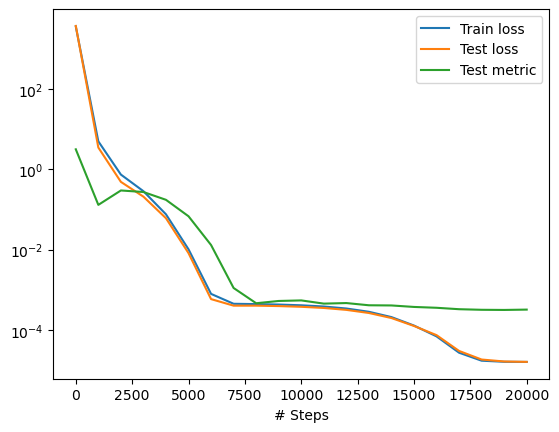

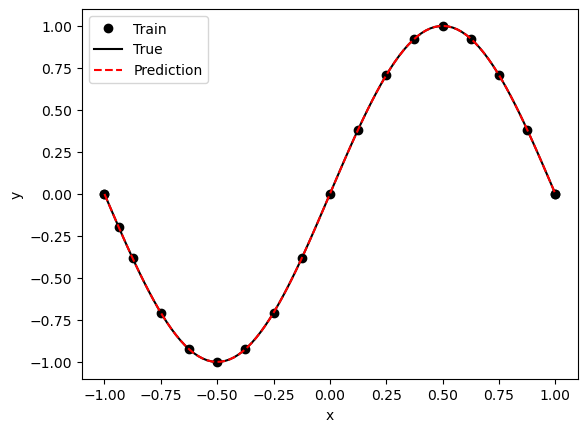

In [3]:
M =10
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [4]:
pi = np.pi
history = {}
rr = [0.5, 1, 3, 4, 5, 6]

M = 200
layer_size = [1] + [M]  + [1]
activation = ["sin", 'linear']
initializer = "Glorot uniform"
loss = {}
epochs = {}
metric = {}
for i in rr:
    print(i)
    ll = []

    net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=i)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])

    losshistory, train_state = model.train(iterations=50000)
    
    loss_test = losshistory.loss_test
    epochs[i] = losshistory.steps
    metric[i] = losshistory.metrics_test
    for j in range(np.shape(loss_test)[0]):
        ll.append(loss_test[j][0])
    loss[i] = ll

0.5
Compiling model...
'compile' took 0.002841 s

Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss              Test loss               Test metric   
0         [4.32e+01, 1.41e-01]    [4.88e+01, 1.41e-01]    [7.83e-01]    
1000      [3.00e+01, 4.85e-02]    [3.32e+01, 4.85e-02]    [6.83e-01]    
2000      [2.45e+01, 1.16e-02]    [2.51e+01, 1.16e-02]    [6.07e-01]    
3000      [2.30e+01, 1.28e-03]    [2.15e+01, 1.28e-03]    [5.60e-01]    
4000      [2.27e+01, 2.15e-05]    [2.03e+01, 2.15e-05]    [5.40e-01]    
5000      [2.27e+01, 3.02e-06]    [2.01e+01, 3.02e-06]    [5.36e-01]    
6000      [2.27e+01, 4.23e-06]    [2.01e+01, 4.23e-06]    [5.36e-01]    
7000      [2.27e+01, 3.94e-06]    [2.01e+01, 3.94e-06]    [5.36e-01]    
8000      [2.27e+01, 3.70e-06]    [2.00e+01, 3.70e-06]    [5.36e-01]    
9000      [2.27e+01, 3.51e-06]    [2.00e+01, 3.51e-06]    [5.35e-01]    
10000     [2.27e+01, 3.31e-06]    [2.00e+01, 3.31e-06]    [5.35e-01]    
11000     [2.27e+01, 2.96e-06]    [2.00e+01, 2.96e-06]    [5.35e-01]    
12000     [2.26e+01, 3.33e-06]    [2.00e+01, 3.33e-

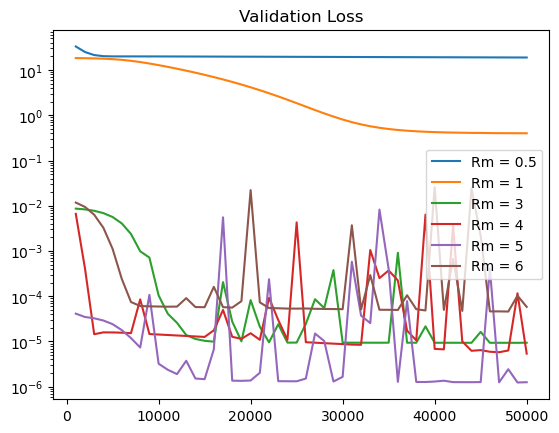

In [5]:
for i in loss:
    plt.plot(epochs[i][1:], loss[i][1:], label = 'Rm = ' + str(i))
plt.yscale('log')
plt.title('Validation Loss')
plt.legend()
plt.show()

## Poisson 1D: soluzione = $sin(3\pi\,x + \frac{3\pi}{20}) * cos(2\pi\,x + \frac{\pi}{10}) + 2$


In [6]:
pi = np.pi
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    #return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    #return np.sin(np.pi * x)
    return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
num_points = 50
num_validation = 100
data = dde.data.PDE(geom, pde, bc, num_points, 2, solution=func, num_test=num_validation)

Compiling model...
'compile' took 0.000578 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [7.38e+03, 2.61e+00]    [7.41e+03, 2.61e+00]    [1.05e+00]    
1000      [7.00e+03, 6.22e-01]    [6.98e+03, 6.22e-01]    [6.00e-01]    
2000      [6.90e+03, 2.07e-01]    [6.89e+03, 2.07e-01]    [3.89e-01]    
3000      [6.76e+03, 2.33e-01]    [6.77e+03, 2.33e-01]    [3.30e-01]    
4000      [6.58e+03, 3.13e-01]    [6.62e+03, 3.13e-01]    [3.32e-01]    
5000      [6.38e+03, 3.58e-01]    [6.46e+03, 3.58e-01]    [3.38e-01]    
6000      [6.19e+03, 3.45e-01]    [6.29e+03, 3.45e-01]    [3.35e-01]    
7000      [6.02e+03, 3.08e-01]    [6.15e+03, 3.08e-01]    [3.29e-01]    
8000      [5.87e+03, 2.61e-01]    [6.02e+03, 2.61e-01]    [3.22e-01]    
9000      [5.74e+03, 2.07e-01]    [5.91e+03, 2.07e-01]    [3.13e-01]    
10000     [5.63e+03, 1.61e-01]    [5.82e+03, 1.61e-01]    [3.05e-01]    
11000     [5.54e+03, 1.20e-01]    [5.74e+03, 1.20e-01]    [

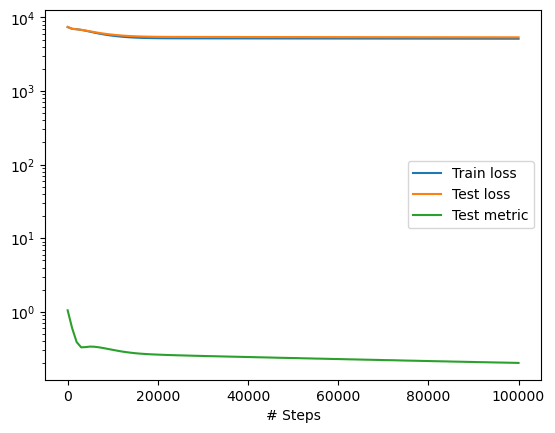

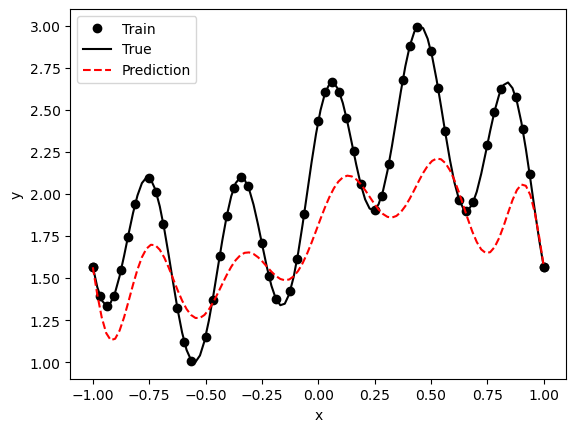

In [7]:
M =200
layer_size = [1] + [M] + [1]
activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=100000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)


Compiling model...
'compile' took 0.000393 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [7.83e+03, 3.05e+00]    [8.07e+03, 3.05e+00]    [1.11e+00]    
1000      [7.92e-01, 4.52e-02]    [4.52e+03, 4.52e-02]    [3.59e-01]    
2000      [7.72e-01, 1.80e-04]    [4.47e+03, 1.80e-04]    [2.99e-01]    
3000      [2.96e-01, 1.69e-05]    [4.31e+03, 1.69e-05]    [3.10e-01]    
4000      [1.59e-02, 4.84e-05]    [4.17e+03, 4.84e-05]    [3.24e-01]    
5000      [1.55e-01, 1.14e-04]    [4.12e+03, 1.14e-04]    [3.36e-01]    
6000      [4.18e-01, 3.87e-05]    [4.07e+03, 3.87e-05]    [3.51e-01]    
7000      [5.68e-01, 4.64e-06]    [3.98e+03, 4.64e-06]    [3.65e-01]    
8000      [7.83e-01, 1.91e-05]    [3.90e+03, 1.91e-05]    [3.77e-01]    
9000      [1.18e-01, 1.40e-05]    [3.72e+03, 1.40e-05]    [3.90e-01]    
10000     [1.36e+00, 1.67e-05]    [3.57e+03, 1.67e-05]    [3.98e-01]    
11000     [7.26e-01, 2.10e-05]    [3.45e+03, 2.10e-05]    [

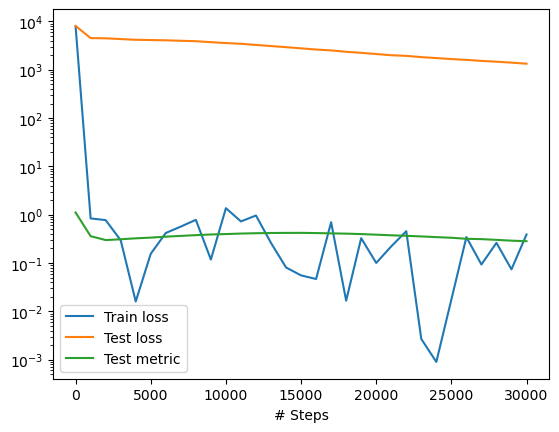

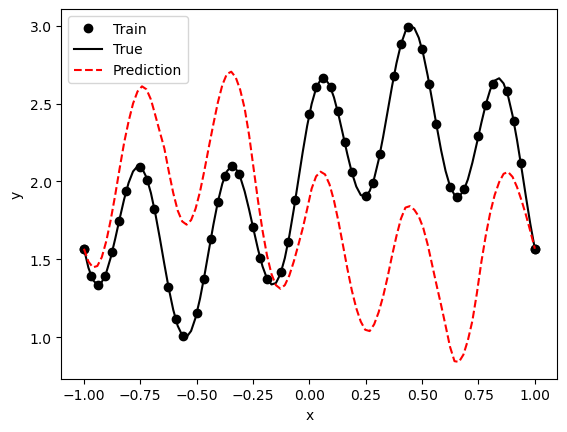

In [9]:
M =200
layer_size = [1] + [M] + [100] + [1]
activation = ["sin", 'sigmoid','linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=30000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

## Partition of Unit

In [15]:
def pou(N, dim, x, solution, boundary, pde, num_train=15, num_boundary=2, num_validation=100, M=50, Rm=10, iter=20000):

    geom, bc, data = np.empty(N, dtype=object), np.empty(N, dtype=object), np.empty(N, dtype=object)
    
    layer_size = [1] + [M]  +  [1]
    activation = ["sin", 'linear']
    initializer = "Glorot uniform"

    model, net = np.empty(N, dtype=object), np.empty(N, dtype=object)
    losshistory, train_state = np.empty(N, dtype=object), np.empty(N, dtype=object)

    if dim == 1:
        xx = np.linspace(x[0], x[1], N+1)
        for i in prange(N):
            
            geom[i] = dde.geometry.Interval(xx[i], xx[i+1])
            bc[i] = dde.icbc.DirichletBC(geom[i], solution, boundary)
            data[i] = dde.data.PDE(geom[i], pde, bc[i], num_train, num_boundary, solution=solution, num_test=num_validation)

            net[i] = dde.nn.random_FNN(layer_size, activation, initializer, Rm=Rm)

            model[i] = dde.Model(data[i], net[i])

            model[i].compile("adam", lr=0.001, metrics=["l2 relative error"])

            losshistory[i], train_state[i] = model[i].train(iterations=iter)

    return model, losshistory, train_state, geom


def pou_visualization(losses, train_state):
    N = np.shape(train_state)[0]
    xtest, ytest, ypred = np.empty(N, dtype=object), np.empty(N, dtype=object), np.empty(N, dtype=object)
    for i in range(N):
        xtest[i], ytest[i], ypred[i] = train_state[i].X_test, train_state[i].y_test, train_state[i].y_pred_test

        u = xtest[i][1]
        xtest[i] = np.delete(xtest[i], 1)
        xtest[i] = np.append(xtest[i], u)

        uu = ytest[i][1]
        ytest[i] = np.delete(ytest[i], 1)
        ytest[i] = np.append(ytest[i], uu)

        uuu = ypred[i][1]
        ypred[i] = np.delete(ypred[i], 1)
        ypred[i] = np.append(ypred[i], uuu)

        #plt.scatter(xtest[i], ytest[i], c='black')
        plt.plot(xtest[i], ytest[i], c='black')
        plt.plot(xtest[i], ypred[i], c='red', ls = '--')
    
    plt.show()

    steps = losses[0].steps
    time = np.shape(steps)[0]
    max_train, max_test = np.zeros(time), np.zeros(time)

    for j in range(time):
        for i in range(N):
            train, test = losses[i].loss_test, losses[i].loss_train

            if train[j][0] > max_train[j]:
                max_train[j] = train[j][0]

            if test[j][0] > max_test[j]:
                max_test[j] = test[j][0]
    
    plt.plot(steps, max_train, c='orange', label='training loss')
    plt.plot(steps, max_test, c='green', label='validation loss')
    plt.yscale('log')
    plt.legend()
    plt.show()


In [19]:
model, loss, train, geom = pou(4, 1, [-1, 1], func, boundary, pde, iter=100000, M=400)

Compiling model...
'compile' took 0.000392 s

Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss              Test loss               Test metric   
0         [2.45e+04, 1.22e-01]    [2.43e+04, 1.22e-01]    [1.48e+00]    
1000      [1.30e+03, 2.44e+01]    [1.04e+03, 2.44e+01]    [1.83e+00]    
2000      [9.42e+02, 5.47e+00]    [7.64e+02, 5.47e+00]    [1.22e+00]    
3000      [5.76e+02, 1.37e+01]    [4.76e+02, 1.37e+01]    [1.88e+00]    
4000      [3.10e+02, 5.95e+01]    [2.63e+02, 5.95e+01]    [3.29e+00]    
5000      [1.79e+02, 1.13e+02]    [1.55e+02, 1.13e+02]    [4.34e+00]    
6000      [1.35e+02, 1.37e+02]    [1.19e+02, 1.37e+02]    [4.73e+00]    
7000      [1.25e+02, 1.37e+02]    [1.10e+02, 1.37e+02]    [4.72e+00]    
8000      [1.20e+02, 1.31e+02]    [1.06e+02, 1.31e+02]    [4.61e+00]    
9000      [1.16e+02, 1.24e+02]    [1.02e+02, 1.24e+02]    [4.49e+00]    
10000     [1.11e+02, 1.17e+02]    [9.91e+01, 1.17e+02]    [4.36e+00]    
11000     [1.08e+02, 1.10e+02]    [9.60e+01, 1.10e+02]    [4.22e+00]    
12000     [1.04e+02, 1.03e+02]    [9.33e+01, 1.03e+

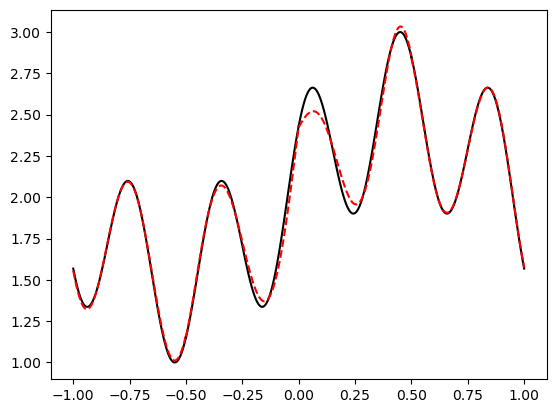

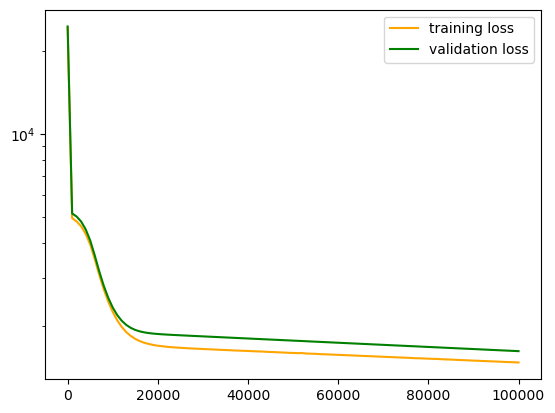

In [20]:
pou_visualization(loss, train)

In [2]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + y - (1 + np.pi ** 2 )* tf.sin(np.pi * x)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

Compiling model...
'compile' took 0.001747 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [1.93e+03, 3.28e-01]    [2.09e+03, 3.28e-01]    [7.22e-01]    
1000      [7.72e+00, 6.10e-03]    [2.79e+00, 6.10e-03]    [1.27e-01]    
2000      [4.79e-01, 3.52e-01]    [1.95e-01, 3.52e-01]    [4.57e-01]    
3000      [3.47e-01, 1.45e-01]    [2.33e-01, 1.45e-01]    [2.94e-01]    
4000      [3.34e-01, 2.72e-02]    [2.59e-01, 2.72e-02]    [1.28e-01]    
5000      [3.22e-01, 3.59e-03]    [2.65e-01, 3.59e-03]    [5.04e-02]    
6000      [2.97e-01, 1.27e-03]    [2.48e-01, 1.27e-03]    [3.42e-02]    
7000      [2.59e-01, 1.01e-03]    [2.17e-01, 1.01e-03]    [3.10e-02]    
8000      [2.06e-01, 8.04e-04]    [1.73e-01, 8.04e-04]    [2.76e-02]    
9000      [1.41e-01, 5.48e-04]    [1.19e-01, 5.48e-04]    [2.27e-02]    
10000     [7.62e-02, 2.90e-04]    [6.49e-02, 2.90e-04]    [1.65e-02]    
11000     [2.76e-02, 9.96e-05]    [2.41e-02, 9.96e-05]    [9.60e-03]    
12000     [5.41e-03, 1.59e-05]  

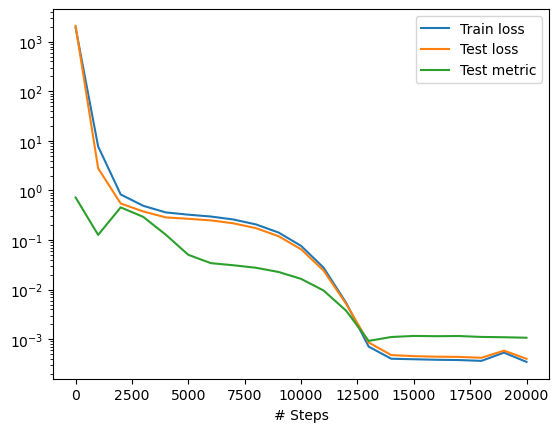

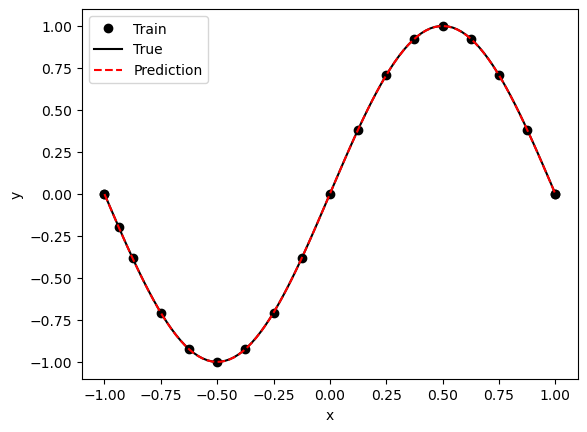

In [25]:
M =10
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
def psi(x):
    return tf.where(x > 1 or x < -1, 0.0, 1.0)

def indicatrice(a,b):
    return lambda x: psi((2*x-b-a)/(b-a))

#indicatrici = [indicatric(x0, x0+h)]

In [3]:
npart = 4
arr = np.linspace(-1, 1, npart + 1)

nn_indicatrici = [indicatrice(arr[i], arr[i+1]) for i in range(npart)]


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

In [4]:
M =10
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.partioned_random_FNN(layer_size, activation, initializer, npart, nn_indicatrici, Rm=10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

losshistory, train_state = model.train(iterations=20000)

Compiling model...
'compile' took 0.000367 s

Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss              Test loss               Test metric   
0         [4.34e+03, 1.72e+00]    [4.02e+03, 1.72e+00]    [2.62e+00]    
1000      [1.06e+01, 1.98e+00]    [9.27e+00, 1.98e+00]    [1.17e+00]    
2000      [7.33e+00, 7.28e-03]    [5.64e+00, 7.28e-03]    [6.34e-02]    
3000      [4.79e+00, 6.49e-02]    [3.64e+00, 6.49e-02]    [2.01e-01]    
4000      [2.42e+00, 3.52e-02]    [1.85e+00, 3.52e-02]    [1.48e-01]    
5000      [7.79e-01, 1.16e-02]    [6.09e-01, 1.16e-02]    [8.54e-02]    
6000      [1.22e-01, 1.79e-03]    [1.03e-01, 1.79e-03]    [3.37e-02]    
7000      [9.41e-03, 7.41e-05]    [1.07e-02, 7.41e-05]    [7.12e-03]    
8000      [4.16e-03, 8.15e-08]    [4.68e-03, 8.15e-08]    [1.16e-03]    
9000      [4.05e-03, 1.96e-07]    [4.41e-03, 1.96e-07]    [1.19e-03]    
10000     [3.93e-03, 1.40e-07]    [4.28e-03, 1.40e-07]    [1.07e-03]    
11000     [3.75e-03, 1.33e-07]    [4.08e-03, 1.33e-07]    [1.06e-03]    
12000     [3.46e-03, 1.21e-07]    [3.77e-03, 1.21e-

In [7]:
lista = []
lista = lista.append(1)